<a href="https://colab.research.google.com/github/SUNPAUL97/SUNPAUL97/blob/main/DEPLOYING_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## READ DATA

In [ ]:
insurance = pd.read_csv('Medical_insurance_dataset.csv')
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [ ]:
# since User ID is not important we dropped it
insurance.drop(['User ID'],axis = 'columns', inplace =True)
insurance.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased


In [ ]:
insurance.shape

(400, 4)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.6+ KB


In [ ]:
#mapping the values 1 to purchased and 0 to not purchased
insurance['Purchased'] = insurance['Purchased'].apply(lambda x:1 if x == 'purchased' else 0)
#Read data again
insurance.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [ ]:
#checking data info
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


# EDA

<AxesSubplot:xlabel='Purchased', ylabel='count'>

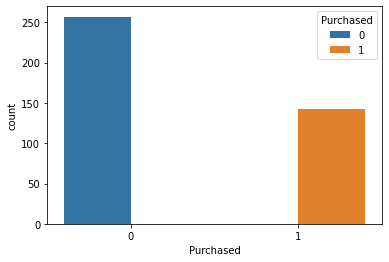

In [ ]:
sns.countplot(x='Purchased', data= insurance, hue='Purchased')

#### From the EDA we can see that there is class imbalance, that is there is no equal proportion among those that buy or not

<AxesSubplot:xlabel='Gender', ylabel='count'>

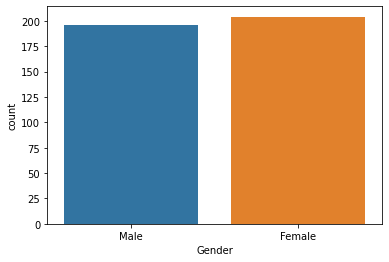

In [ ]:
sns.countplot(x='Gender', data = insurance)

## We can see that there is no much difference between males and females

<AxesSubplot:xlabel='Gender', ylabel='count'>

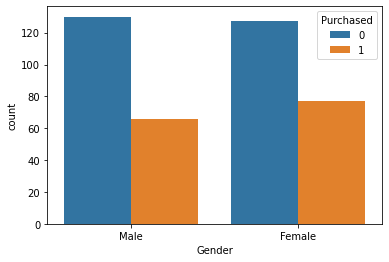

In [ ]:
#Let's compare who likely to buy more between males and females
sns.countplot(x='Gender',data = insurance, hue='Purchased')

## It seems that females wanted to buy more than males

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

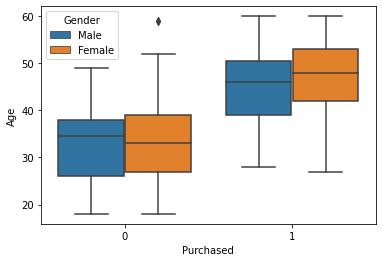

In [ ]:
sns.boxplot(x='Purchased',y= 'Age',data = insurance,  hue='Gender')

### As we can see older people buy insurance more than the younger ones

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

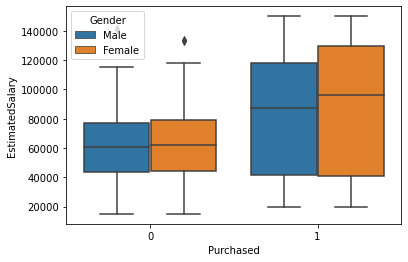

In [ ]:
sns.boxplot(x='Purchased',y= 'EstimatedSalary',data = insurance,  hue='Gender')

### People that earned higher salary purchased the insurance while those that earned low did not purchase the insurance. Of course, it is expected you purchase a medical insurance when you have money.

# MODEL BUILDING

In [ ]:
from sklearn import metrics # Module for evaluation
from sklearn.model_selection import train_test_split # Module for splitting data

#### Preparing the Data for modeling(Separating features and the label from the data) Now is the time to build machine learning models for the task of predicting whether the customers will buy medical insurance or not. Therefore, we shall separate the set of features (X) from the label (Y).

In [ ]:
X = insurance.drop(['Purchased'],axis ='columns')
y = insurance['Purchased']

In [ ]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


### As discussed previously, we need to create a one-hot encoding for all the categorical features in the data because some algorithms cannot work with categorical data directly. They require all input variables and output variables to be numeric. In this case, we will create a one-hot encoding for the gender feature by using pd.get_dummies(). As shown below:

In [ ]:
pd.get_dummies(insurance['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [ ]:
X = pd.get_dummies(X)
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [ ]:
!pip3 install imblearn

In [ ]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution

counter = Counter(y)
print(counter)

Counter({0: 257, 1: 257})


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              514 non-null    int64
 1   EstimatedSalary  514 non-null    int64
 2   Gender_Female    514 non-null    uint8
 3   Gender_Male      514 non-null    uint8
dtypes: int64(2), uint8(2)
memory usage: 9.2 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logistic_prediction = logisticmodel.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,logistic_prediction)

0.4563106796116505

### Model evaluation:

Since we know the true label in the test set (i.e. y_test), we can compare this prediction with it, hence evaluate the logistic model. I have created a function that will help you visualize a confusion matrix for the logistic model and you can call on it henceforth to check the performance of any model.

In [ ]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

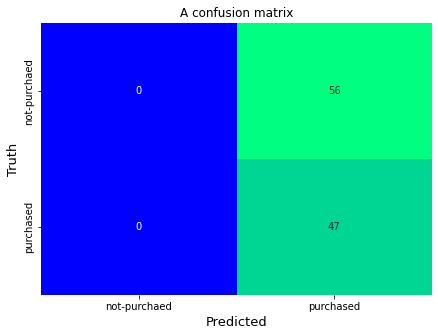

In [ ]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-purchaed", "purchased"])

In [ ]:
print(metrics.classification_report(y_test,logistic_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.46      1.00      0.63        47

    accuracy                           0.46       103
   macro avg       0.23      0.50      0.31       103
weighted avg       0.21      0.46      0.29       103



In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = randomforestmodel.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, rf_prediction)

0.941747572815534

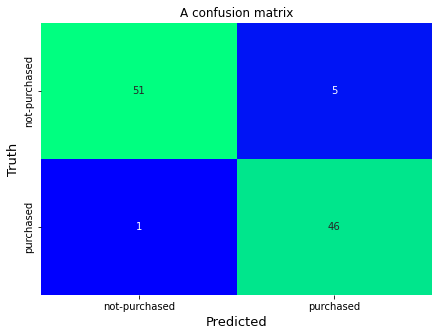

In [ ]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-purchased", "purchased"])

In [ ]:
print(metrics.classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        56
           1       0.90      0.98      0.94        47

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test,rf_prediction))

0.9387755102040817


## Let us improve our model by tuning our hyper parameter

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel =RandomForestClassifier(n_estimators = 250)
randomforestmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [ ]:
rfc_prediction = randomforestmodel.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, rfc_prediction)

0.9320388349514563

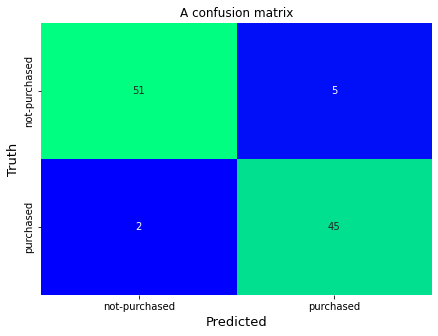

In [ ]:
ConfusionMatrix(y_test, rfc_prediction, label = ['not-purchased', 'purchased'])

In [ ]:
print(metrics.classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        56
           1       0.90      0.96      0.93        47

    accuracy                           0.93       103
   macro avg       0.93      0.93      0.93       103
weighted avg       0.93      0.93      0.93       103



In [ ]:
print(f1_score(y_test, rfc_prediction))

0.9278350515463918


## saving the model

In [ ]:
import pickle
pickle_out = open('rfmodel.pkl', mode = 'wb')
pickle.dump(randomforestmodel, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open('rfmodel.pkl', 'rb')
clf = pickle.load(pickle_in)

In [ ]:
print(clf.predict([[34, 400, 1, 0]]))

[0]


In [ ]:
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [ ]:
!pip install -q pyngrok
!pip install -q streamlit
!pip install -q streamlit_ace

In [ ]:
%%writefile app.py
import pickle
import streamlit as st
pickle_in = open('rfmodel.pkl', 'rb') 
clf = pickle.load(pickle_in)

@st.cache()


def make_prediction(Age,EstSalary,Gender):
  if Gender == "Male":
    GenderM = 1
    GenderF = 0
  elif Gender == "Female":
    GenderM = 0
    GenderF = 1

  prediction = clf.predict([[Age, EstSalary, GenderF, GenderM]])[0]  
    
  if prediction == 0:
    value = "not to purchase"
  else:
    value = "to purchase"
  return value

def main():       
    #front end elements
    html_temp = """ 
    <div style ="background-color:green;padding:13px"> 
    <h1 style ="color:white;text-align:center;">SUNPAUL' Insurance Prediction</h1> 
    </div> 
    """
    
    #front end
    st.markdown("![](https://www.datasciencenigeria.org/wp-content/uploads/2022/03/AIEHeader-1.png)")
    st.markdown(html_temp, unsafe_allow_html = True) 

    # following lines create boxes in which user can enter data required to make prediction 
    Age = st.number_input('Enter the Age')
    EstSalary = st.number_input('Enter Estimated Salary')
    Gender = st.selectbox('Gender',("Male","Female"))
    result = ""
    
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Make Prediction"): 
        result = make_prediction(Age, EstSalary, Gender) 
        st.success('This customer is likely {}'.format(result))
        print("Just test")
     
if __name__=='__main__':
  main()

Overwriting app.py


In [ ]:
!streamlit run app.py

In [ ]:
from pyngrok import ngrok
!ngrok authtoken 27C2fhEiHXoQ1EinkugpDslg61N_787RcqNnASnrXMWYiCF4T
public_url = ngrok.connect('8501')
public_url